plot the density function of the normal distribution
plot the histogram of a sample with the probability distribution superimposed
calculate probabilities in the normal distribution
calculate confidence intervals

In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

In [ ]:
# plot of the normal distribution

The standard normal distribution $Z \sim Nor(\mu = 0, \sigma = 1)$ can be plotted as follows:

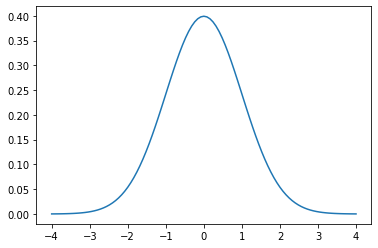

In [2]:
# Take 100 values for the X-axis, between -4 and 4, evenly spaced
x = np.linspace(-4, +4, num=101)
y = stats.norm.pdf(x, 0, 1)
# Plot the probability density function (pdf) for these X-values
plt.plot(x, y)

The `pdf()`-function allows us to specify mean and standard deviation as parameters.

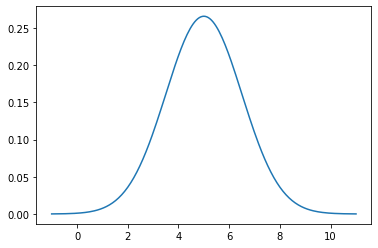

In [3]:
m = 5    # Gemiddelde
s = 1.5  # Standaardafwijking
x = np.linspace(m - 4 * s, m + 4 * s, num=201)
plt.plot(x, stats.norm.pdf(x, loc=m, scale=s))

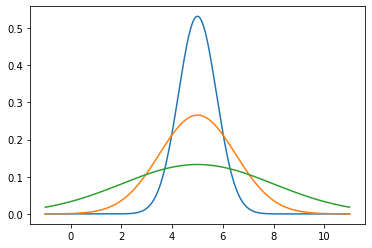

In [4]:
# Probability density of a normal distribution with different standard
# deviations
m = 5    # Mean
x = np.linspace(m - 4 * s, m + 4 * s, num=201)

plt.plot(x, stats.norm.pdf(x, loc=m, scale=.75))
plt.plot(x, stats.norm.pdf(x, loc=m, scale=1.5))
plt.plot(x, stats.norm.pdf(x, loc=m, scale=3))

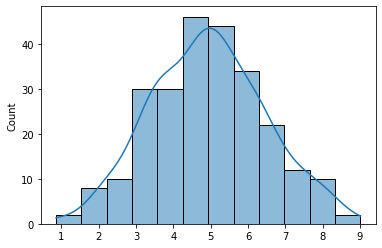

In [11]:
# Generate 10000 random numbers, following a normal distribution
n = 250
observations = np.random.normal(loc=m, scale=s, size=n)

# Plot histogram, without probability density
obs_hist = sns.histplot(observations, kde=True)



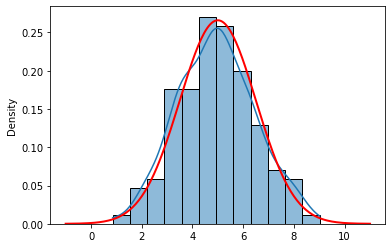

In [12]:
# histogram with observations
obs_hist = sns.histplot(observations, stat = "density", kde=True)
# X-axis values
dist_x = np.linspace(m - 4 * s, m + 4 * s, num=201)
# Probability density for the X-values
dist_y = stats.norm.pdf(dist_x, m, s)

# Plot the Gayss curve superimposed on the histogram
obs_hist.plot(dist_x, dist_y, 'red', lw=2)

What is the probability that we observe a reaction speed larger than 6.5 ms? Mathematical notation: $P(X > 6.5)$

In [13]:
m = 5
s = 1.5
x = 6.5
stats.norm.sf(x, loc=m, scale=s)

0.15865525393145707

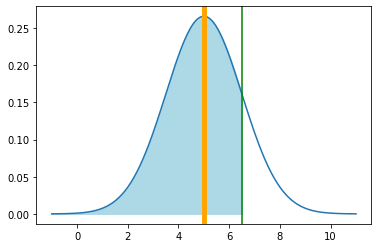

In [14]:
# X-values
dist_x = np.linspace(m - 4 * s, m + 4 * s, num=201)
# Y-values for drawing the Gauss curve
dist_y = stats.norm.pdf(dist_x, m, s)
# Plot the Gauss-curve
plt.plot(dist_x, dist_y)
# Fill the area left of x
plt.fill_between(dist_x, 0, dist_y, where=dist_x <= x, color='lightblue')
# Show the mean with an orange line
plt.axvline(m, color="orange", lw=5)
# Show x with a green line
plt.axvline(x, color="green")

In [18]:
print("4. P(2 < X < 6.5) ~= %.3f" % (stats.norm.cdf(6.5, loc=m, scale=s) -
                                  stats.norm.cdf(2, loc=m, scale=s)))

4. P(2 < X < 6.5) ~= 0.819


In [21]:
print("P(X < %.4f) ≃ 0.8" % stats.norm.isf(0.2, loc=m, scale=s))

P(X < 6.2624) ≃ 0.8


Confidence intervals

In [22]:
# big sample
m = 5.2     #sample mean
s = 1.5     #population standard deviation
n = 100     #sample size
alpha = 0.05 #1 - alpha is the confidence level

z = stats.norm.isf(alpha/2)
print(f"z-score: {z}")

lo = m - z * s / np.sqrt(n)
hi = m + z * s / np.sqrt(n)
print(f"confidence interval: [{lo}, {hi}]")


z-score: 1.9599639845400545
confidence interval: [4.906005402318992, 5.4939945976810085]


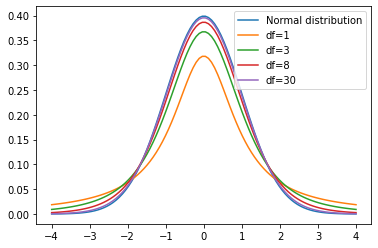

In [23]:
# t-distribution for small sample
x = np.linspace(-4, +4, num=100)
fig, tplot = plt.subplots(1, 1)
tplot.plot(x, stats.norm.pdf(x, 0, 1), label="Normal distribution")
tplot.plot(x, stats.t.pdf(x, 1), label="df=1")
tplot.plot(x, stats.t.pdf(x, 3), label="df=3")
tplot.plot(x, stats.t.pdf(x, 8), label="df=8")
tplot.plot(x, stats.t.pdf(x, 30), label="df=30")
tplot.legend(loc='best')

In [26]:
# small sample
m = 5.2
s = 1.5
n = 15
alpha = 0.05

t = stats.t.isf(alpha/2, df = n - 1)
print(f"t-score: {t}")

lo = m - t * s / np.sqrt(n)
hi = m + t * s / np.sqrt(n)
print(f"Confidence interval: [{lo:.2f}, {hi:.2f}]")

t-score: 2.1447866879169277
Confidence interval: [4.37, 6.03]
